# Individual Planning Report
This is an individual planning report for predicting the usage of a video game research server, which consists of four parts: a description of the dataset, identification of Question 1, basic exploratory data analysis and visualization, and methods & plan.

## 1. Data Description

In [32]:
library(tidyverse)

In [33]:
players_url <- "https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz"
players <- read_csv(players_url)
head(players)

experience_types <- group_by(players, experience) |>
    summarize(count = n())
experience_types

gender_types <- group_by(players, gender) |>
    summarize(count = n())
gender_types

non_individual_id <- filter(players, individualId != NA)
non_individual_id

non_organization_name <- filter(players, organizationName != NA)
non_organization_name

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<lgl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,NA,NA
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,NA,NA
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,NA,NA
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,NA,NA
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17,NA,NA


experience,count
<chr>,<int>
Amateur,63
Beginner,35
Pro,14
Regular,36
Veteran,48


gender,count
<chr>,<int>
Agender,2
Female,37
Male,124
Non-binary,15
Other,1
Prefer not to say,11
Two-Spirited,6


experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<lgl>


experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<lgl>


1. basic information </br>
The dataset of players has 196 observations and 9 variables.

- characters type
  - `experience`: self-assigned experience level with 5 categories:
    - Amateur
    - Beginner
    - Pro
    - Regular
    - Veteran
  - `hashedEmail`: hashed emails of players to record users' accounts in a secure way.
  - `name`: players' in-game name.
  - `gender`: players' self-identified gender.
- digital type
  - `played_hours`: time spent by players on the game.
  - `age`: age of players
- logical type
  - `subscribe`: indicates whether players subscribe to the game.
  - `individualId`: unique ID of each player (all values are NA).
  - `organizationName`: name of the organization that players belong to (all values are NA).

2. issues
- directive issues: all values of `individualId` and `organizationName` are NA.
- potential issues: `experience` is a self-assigned level recorded during registration, there is no standard for measuring it.

3. data collection </br>
The data was collected when players registered their accounts and updated each time they played the game.

4. general understanding </br>
The dataset of players records basic information, including `experience`, `played_hours`, `age`, and `gender`, which may be useful for our future analysis. `individualId` appears to be a player ID, which may not contribute to our analysis, so the fact that all values are NA may have little impact. However, if players belong to an organization, they might spend more time on the game, so having all values of `organizationName` as NA could influence the analysis. Additionally, since `experience` is a self-assigned level and each player has their own standard, it may lack accuracy for analysis.

In [34]:
sessions_url <- "https://drive.google.com/uc?export=download&id=14O91N5OlVkvdGxXNJUj5jIsV5RexhzbB"
sessions <- read_csv(sessions_url)
head(sessions)

(count (filter(sessions, original_start_time == original_end_time))) / 1535

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


n
<dbl>
0.7192182


1. basic information </br>
The dataset of sessions has 1535 ovservations and 5 variables.
- character
  - `hashedEmail`: email account
  - `start_time`: start time of each game session in Date format
  - `end_time`: end time of each game session in Date format
- doubles
  - `original_start_time`: start time of each game session in digital format
  - `original_end_time`: end time of each game session in digital format
  
2. issues
- direct issue: 72% of observations have the same values for `original_start_time` and `original_end_time`.
- potential issue: not found

3. data collection </br>
Data was collected when each game started and ended.
   
4. general understanding </br>
This dataset records the duration of each game session for each player. Most of the `original_start_time` and `original_end_time` values appear to be the same, so we shouldn't use these two variables in our analysis. Instead, we should use `start_time` and `end_time` to calculate `played_hours`. It seems that this dataset may not directly contribute to our analysis.

## 2. Identification of Question 1
My group is interested in Question 1. The response variable is experience, and the primary explanatory variable is played_hours, as spending more time on the game likely increases a player’s likelihood of contributing to the project. Additionally, we can include subscribe and organizationName (if consistent) as explanatory variables. Players who subscribe to the game may pay more attention to it, and players with teammates may feel more engaged.

The plan is as follows:

1. Single explanatory variable
  - Convert experience to a factor type
  - Split the dataset into training and testing subsets
  - Standardize the training data
  - Use the KNN method to train the model on the training dataset
  - Cross validate and choose best K
  - Make predictions
  - Evaluate the model
     
2. Multiple explanatory variables </br>
Repeat the steps above to predict and evaluate performance.

3. Comparison </br>
Compare the performance of single and multiple explanatory variables and choose the better solution.

## 3. Basic Exploratory Data Analysis and Visualization


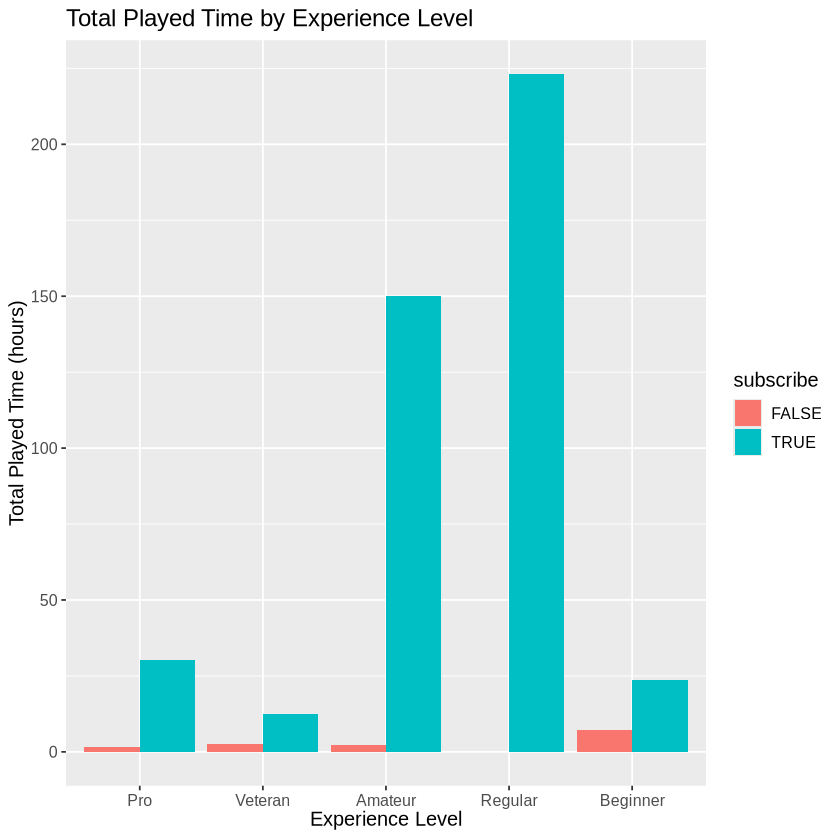

In [50]:
players <- players |>
    mutate(experience = as_factor(experience)) |>
    select(experience, subscribe, played_hours)

ggplot(players, aes(x = experience, y = played_hours, fill = subscribe)) +
    geom_bar(stat = "identity", position = "dodge") + 
    labs(x = "Experience Level",
         y = "Total Played Time (hours)",
        title = "Total Played Time by Experience Level") +
    theme(text = element_text(size = 12)) 

Subscribed players play the game much more than those who are not. Veteran players play the least, while Regular players play the most. The most promising targets for recruiting efforts to contribute large amounts of data are subscribed Regular and Amateur players.

## 4. Methods and Plan
We plan to use classification with K-nearest neighbors to analyze question 1, as `experience` is a categorical variable. This method is simple and requires few assumptions. The dataset is not large, so the method can be applied effectively. However, the classes are imbalanced, which is a potential weakness of the method. Therefore, we need to carefully analyze the performance metrics.
we will use performance metrics that account for the class imbalance in our dataset, such as precision, recall, and confusion matrix, rather than relying solely on accuracy. We will evaluate our KNN model using these metrics on both single and multiple explanatory variables and choose the model with better performance. Specific steps please refer to Section 2.